**<h2>Pandas Exhibition: Index Return</h2>**

Description:

Please calculate the index return for the S&P 500 for the full year 2022 including:

- Return of the entire index
- Returns by Market Capitalization


In [2]:
#IMPORT STATEMENTS

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import yfinance as yf

In [3]:
#load dataset: yahoo finance S&P 500 index (2022)
snp500_raw_df = yf.download("^GSPC", start="2022-01-01", end="2022-12-31")

snp500_raw_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000


# INDEX RETURN: Return of the entire index

In [4]:
#price return is used = ((ending price - starting price)/starting price) * 100

p_return = snp500_raw_df['Close'].pct_change() * 100

price_return_df = pd.DataFrame({'Returns': p_return}).reset_index()
price_return_df.head()

,Date,Returns
0,2022-01-03,NaN
1,2022-01-04,-0.062962
2,2022-01-05,-1.939276
3,2022-01-06,-0.096377
4,2022-01-07,-0.405022


<Axes: xlabel='Date', ylabel='Returns'>

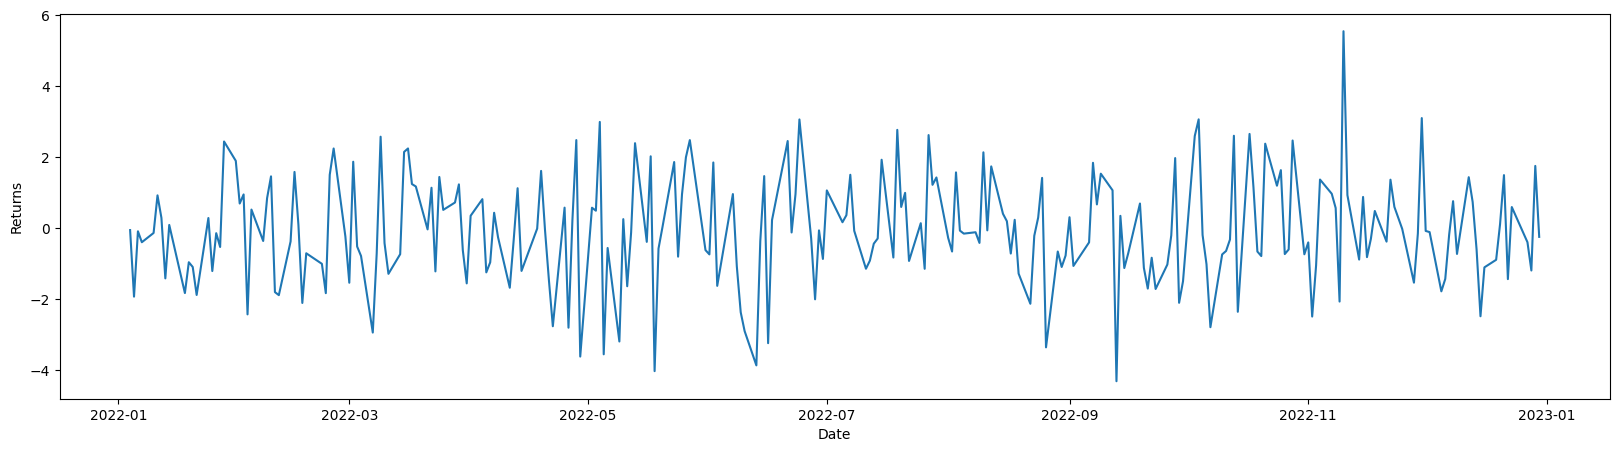

In [5]:
#remove the NaN value line before graphing it
price_return_df = price_return_df.dropna().reset_index(drop=True)

#graph
fig = plt.gcf()
fig.set_size_inches(20, 5) #adjusted for the better viewing 

sns.lineplot(data=price_return_df, x='Date', y='Returns')

# INDEX RETURN: by Market Cap

In [6]:
#load dataset: list of tickers for S&P 500 consituents companies in 2022

#2022 LIST
snp500_2022_constituents = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_S%26P_500_companies&oldid=161654597')[0]
snp500_2022_constituents.head()

,Company,Ticker symbol,SEC filings,Industry
0,3M Company,MMM,reports,Industrial Conglomerates
1,ACE Limited,ACE,reports,Property & Casualty Insurance
2,ADC Telecommunications,ADCT,reports,Communications Equipment
3,AES Corp.,AES,reports,Independent Power Producers & Energy Traders
4,AFLAC Inc.,AFL,reports,Life & Health Insurance


In [18]:
#create another data frame with ticker - with columns Ticker Symbol, Market Cap, Shares 2022, StockPrice 2022, Timestamp.
mCap_calc_df = pd.DataFrame(snp500_2022_constituents['Ticker symbol'], 
                                 columns=['Ticker symbol', 'Market Cap 2022', 'Shares 2022', 'StockPrice 2022', 'Latest Market Cap'])


#trim down tickers for demo purpose
mCap_calc_df = mCap_calc_df.loc[mCap_calc_df['Ticker symbol'].isin(['AAPL', 'GOOG', 'UNH', 'PG', 'CVX'])].reset_index(drop=True)



#for each ticker symbol
#-get last known share number and price in 2022
#-calculate the market cap for 2022
#-obtain 2024 market cap for reference
for index, row in mCap_calc_df.iterrows():
    targetTicker = yf.Ticker(row['Ticker symbol'])
    shareInfo = targetTicker.get_shares_full(start="2022-01-01", end="2022-12-31") #using wide enough range to get data back for sure
    priceInfo = targetTicker.history(start="2022-01-01", end="2022-12-31")

    row['Shares 2022'] = shareInfo.tail(1).item()
    #row['StockPrice 2022'] = priceInfo.loc[shareInfo.tail(1).index.format()[0][:10]]['Close'] #if you need to match the share date
    row['StockPrice 2022'] = priceInfo.tail(1)['Close'].item()
    row['Market Cap 2022'] = np.int_(np.round(row['Shares 2022'] * row['StockPrice 2022'])) #round up then turning numpy float to int
    row['Latest Market Cap'] = targetTicker.info['marketCap']


mCap_calc_df.head()

,Ticker symbol,Market Cap 2022,Shares 2022,StockPrice 2022,Latest Market Cap
0,AAPL,2052830648205,15908100096,129.043106,2618637418496
1,CVX,330343334635,1933639936,170.840149,300134858752
2,GOOG,1145016348195,12904500224,88.730003,1906808717312
3,PG,348061742465,2369700096,146.880081,367306407936
4,UNH,486109491207,934348992,520.265442,420162207744


In [19]:
#find the company with the largest market cap among the above group
mCap_max_ticker = mCap_calc_df.iloc[mCap_calc_df['Market Cap 2022'].idxmax()]['Ticker symbol']


#calculate the return for that company
mc_max_raw_df = yf.download(mCap_max_ticker, start="2022-01-01", end="2022-12-31")

mc_return = mc_max_raw_df['Close'].pct_change() * 100

mc_return_df = pd.DataFrame({'Returns': mc_return}).reset_index()
mc_return_df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Returns
0,2022-01-03,NaN
1,2022-01-04,-1.269160
2,2022-01-05,-2.659988
3,2022-01-06,-1.669334
4,2022-01-07,0.098836


<Axes: xlabel='Date', ylabel='Returns'>

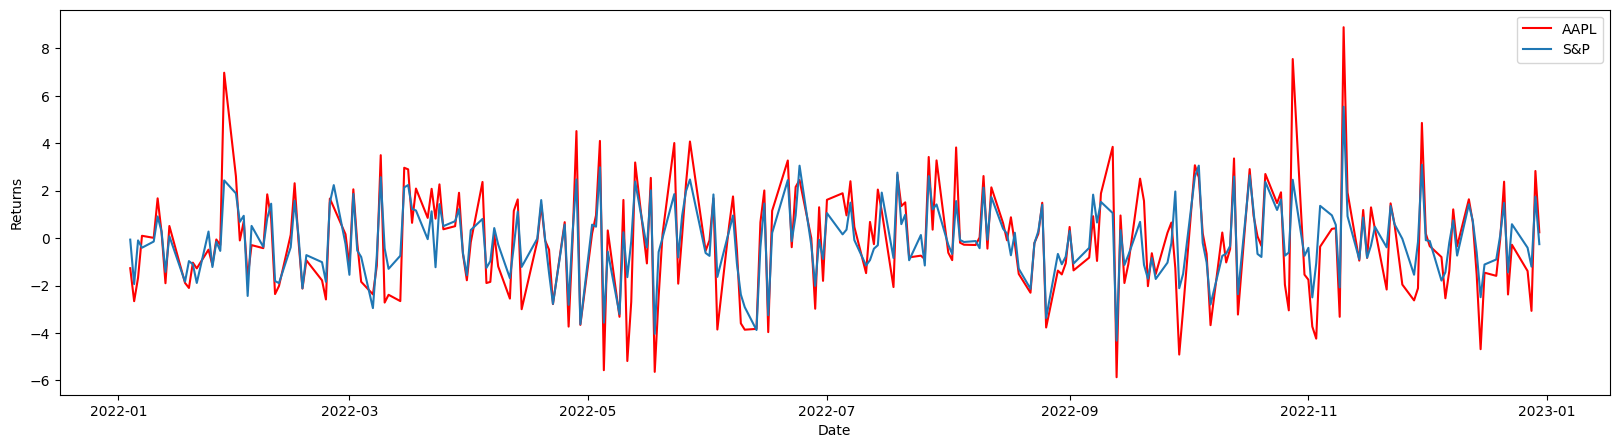

In [20]:
#remove the NaN value line before graphing it
mc_return_df = mc_return_df.dropna().reset_index(drop=True)

#graph
fig = plt.gcf()
fig.set_size_inches(20, 5)

sns.lineplot(data=mc_return_df, x='Date', y='Returns', color='red', label=mCap_max_ticker) #Red: return of large market cap company
sns.lineplot(data=price_return_df, x='Date', y='Returns', label='S&P') #Blue: return of entire index